<a href="https://colab.research.google.com/github/jberkow713/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Jberkow713_Neural_Networks_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


In [0]:
#input Layer: Part of neural network where you input data, weights, alpha(y intercept)

# hidden layer: Layer that helps with the calculations, but one in which is sort of built into the neural network itself, and 
#one in which you don't interact with as much

# output layer: layer that gives classifying results 

# Neuron: individual part of the neural network, sums some value based on weights and other given values, passes it through a sigmoid function
# comes up with collective sum as an output which then creates results

# weight: weights related to inputs, used in the summation to create output values

# activation function : In artificial neural networks, the activation function of a node defines the output 
#of that node given an input or set of inputs.  The activation function decides whether a cell "fires" or not. 

# node map:  it's a visual diagram of the architecture or "topology" of our neural network. 
#It's kind of like a flow chart in that it shows the path from inputs to outputs. 

# Perceptron: A perceptron is just a single node or neuron of a neural network with nothing else. 
# It can take any number of inputs and spit out an output.
# y=sigmoid(∑(weight1input1+weight2input2+weight3input3)+bias) 

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

In [0]:
# You take a bunch of Perceptrons, individual nodes, with weights, values, biases...multiply weights by values individual parts, add bias
# This is the weighted sum, just dot product of inputs and weights
# then you pass this weighted sum through a sigmoid function, it gives you an Activated output. 
# You then subract the activated output from the correct values, to get an error

#You then make an adjustment by multiplying the error by the derivative of the function, using the value of the weighted sum
# and through this, you, basically take the slope of the point on the functions curve, to find out which direction the weights
#should be increasing or decreasing by, in order to point the neuron closer to the direction you know it should be headed in\

#Now, you update the weights, because the weights are essentially what you are looking for , in order to point specific neurons to specific
# targets, and you iterate many many times, until you finally have gotten correct outputs relative to the actual desired output, based 
# on specific weights





#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [0]:
#make into array so that it can be used with the activated output, which is also in array form...otherwise error
correct_outputs =  ([[1],
       [1],
       [1],
       [0]])

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivate(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [10]:
import numpy as np
weights = 2 * np.random.random((3,1)) - 1
weights

array([[-0.30953416],
       [-0.93922773],
       [ 0.56431213]])

In [0]:
inputs = np.array([
                   [0, 0, 1],
                   [1, 0, 1],
                   [0, 1, 1],
                   [1, 1, 0]
])

In [0]:
weighted_sum = np.dot(inputs, weights)

In [0]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.4461392 ],
       [0.60498598],
       [0.53429437],
       [0.73031907]])

In [0]:
error = correct_outputs - activated_output
error 

array([[ 0.5538608 ],
       [ 0.39501402],
       [ 0.46570563],
       [-0.73031907]])

In [0]:
adjustments = error * sigmoid_derivate(weighted_sum)
adjustments

array([[ 0.13685846],
       [ 0.09439964],
       [ 0.11587869],
       [-0.14383862]])

In [0]:
weights += np.dot(inputs.T, adjustments)
weights

array([[0.59312742],
       [0.32571564],
       [0.13085441]])

In [0]:
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    # Can add in learning rate for better performance.
    adjustments = error * sigmoid_derivate(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-2.40970792]
 [-2.41069947]
 [ 7.49014758]]
Output after training
[[0.99944171]
 [0.99382093]
 [0.99381484]
 [0.00799941]]


In [0]:
# so you're left with weights that deliver correct output of 1, 1, 1, 0...through many iterations and updates through the weights
#using gradient descent and the sigmoid function...basically

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [4]:
diab= pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer
import pandas as pd
from sklearn import preprocessing

x = diab.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
diab = pd.DataFrame(x_scaled)

In [0]:
diab.shape

(768, 9)

In [0]:
diab.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [0]:
y = diab.iloc[0:768, 8].values


In [6]:
x = diab.iloc[0:768, [0, 1, 2, 3, 4, 5, 6, 7]].values
x

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:
correct_outputs = y
inputs = x

In [11]:
weights = 2 * np.random.random((9,1)) - 1
weights

array([[-0.837079  ],
       [-0.89377014],
       [ 0.78936212],
       [-0.73265432],
       [ 0.04115866],
       [ 0.05058301],
       [-0.15368796],
       [-0.56978752],
       [-0.9996818 ]])

In [12]:
weighted_sum = np.dot(inputs, weights)

ValueError: ignored

In [13]:
activated_output = sigmoid(weighted_sum)


NameError: ignored

In [0]:
error = correct_outputs - activated_output
error

array([[ 0.64689778, -0.35310222,  0.64689778, ..., -0.35310222,
         0.64689778, -0.35310222],
       [ 0.44494811, -0.55505189,  0.44494811, ..., -0.55505189,
         0.44494811, -0.55505189],
       [ 0.68297441, -0.31702559,  0.68297441, ..., -0.31702559,
         0.68297441, -0.31702559],
       ...,
       [ 0.41884854, -0.58115146,  0.41884854, ..., -0.58115146,
         0.41884854, -0.58115146],
       [ 0.6974189 , -0.3025811 ,  0.6974189 , ..., -0.3025811 ,
         0.6974189 , -0.3025811 ],
       [ 0.41849351, -0.58150649,  0.41849351, ..., -0.58150649,
         0.41849351, -0.58150649]])

In [0]:
adjustments = error * sigmoid_derivate(weighted_sum)

In [0]:
adjustments

array([[ 0.14776507, -0.08065598,  0.14776507, ..., -0.08065598,
         0.14776507, -0.08065598],
       [ 0.10988852, -0.13708077,  0.10988852, ..., -0.13708077,
         0.10988852, -0.13708077],
       [ 0.14787787, -0.0686425 ,  0.14787787, ..., -0.0686425 ,
         0.14787787, -0.0686425 ],
       ...,
       [ 0.10195378, -0.14146066,  0.10195378, ..., -0.14146066,
         0.10195378, -0.14146066],
       [ 0.14717337, -0.06385241,  0.14717337, ..., -0.06385241,
         0.14717337, -0.06385241],
       [ 0.1018432 , -0.1415135 ,  0.1018432 , ..., -0.1415135 ,
         0.1018432 , -0.1415135 ]])

In [0]:
weights += np.dot(inputs.T, adjustments)

ValueError: ignored

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, rate = 0.01, niter = 100):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return None
    
    def __sigmoid_derivative(self, x):
        return None

    def fit(self, x, y):
          x = diab.iloc[0:768, [0, 1, 2, 3, 4, 5, 6, 7]].values
          y = diab.iloc[0:768, 8].values
    
        # Randomly Initialize Weights
          self.weight = 2 * np.random.random((9,1)) - 1
          self.error = [] 
          
          for i in range(self.niter):
            err = 0
            for xi, target in zip(x, y):
              weight_change = self.rate * (target - self.predict(xi))
            
            correct_outputs = y            
            weighted_sum = np.dot(x, weights)
            activated_output = sigmoid(weighted_sum)

            error += correct_outputs - activated_output
            
            adjustments = error * sigmoid_derivate(weighted_sum)
            
            weights += np.dot(inputs.T, adjustments)
    
            print("Weights after training")
            print(weights)

            print("Output after training")
            print(activated_output)
            
    def predict(self, x):
   
        return weights
        return activated_output

In [0]:
class Perceptron1(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
          err = 0
          for xi, target in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            err += int(delta_w != 0.0)
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

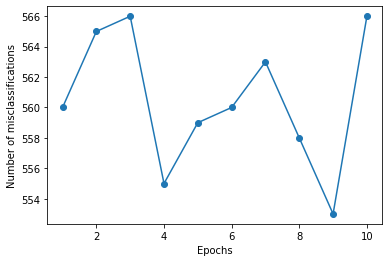

In [21]:
pn = Perceptron1(0.1, 10)
pn.fit(x, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?